In [32]:
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
import pandas as pd

df = spark.sql("select dt, price_close_relative from warehouse.silver.stock_markets_with_relative_prices where symbol in ('AAPL') and dt between '2020-01-01' and '2022-06-30' order by dt")
data = df.toPandas()
train_data = data[:600]
test_data = data[-29:]
#print(test_data)
#print(test_data.loc[:, "dt"])
a=test_data.iloc[0]["dt"]
print(a)
print(type(a))

#print(type(test_data.loc[0, "dt"])



2022-05-19
<class 'datetime.date'>


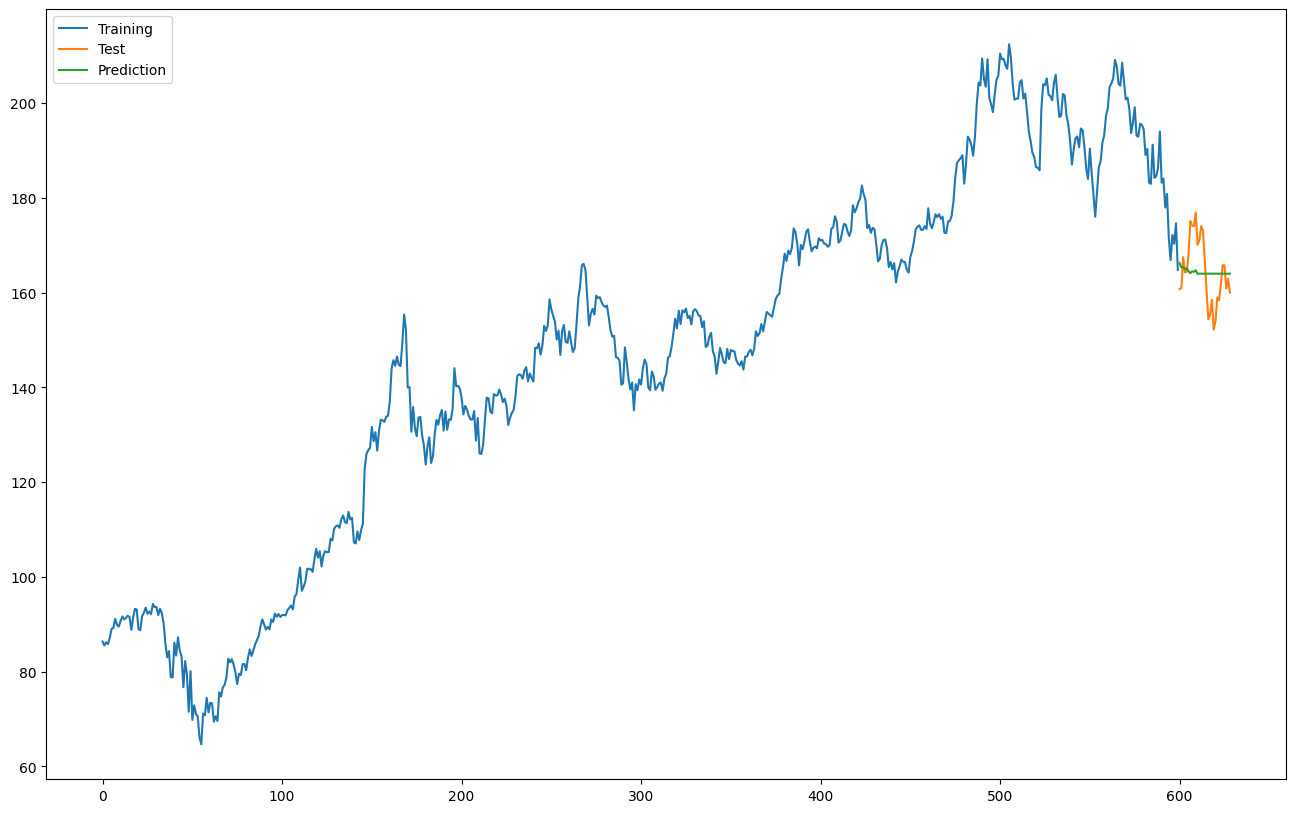

In [30]:

arima_model = auto_arima(train_data["price_close_relative"], start_p=1, start_d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0, start_D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=11, seasonal=True, random_state=20, supress_warning=True, stepwise=True)
arima_model.summary()

predicted_data = pd.DataFrame(arima_model.predict(n_periods=29), index=test_data.index)
predicted_data.columns = ['predicted_close_price']

plt.figure(figsize=(16,10))
plt.plot(train_data["price_close_relative"], label="Training")
plt.plot(test_data["price_close_relative"], label="Test")
plt.plot(predicted_data, label="Prediction")
plt.legend(loc="upper left")
plt.show()

In [4]:
pip install pmdarima matplotlib

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
